## IMPORTS AND LOADING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat #cannot be used for loading because the mat version is 7.3
import h5py
import movmus as mm
import os

In [2]:
# Load the Parquet file
df = pd.read_parquet('TFM_METADATA_SECONDCUT.parquet')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4209 entries, 0 to 4442
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4209 non-null   float64
 1   PARTICIPANT     4209 non-null   float64
 2   T               4209 non-null   float64
 3   ET              4209 non-null   float64
 4   datasize        4209 non-null   float64
 5   PRODUCT_DH      4209 non-null   float64
 6   WEIGHT          4209 non-null   float64
 7   SPAN_1          4209 non-null   float64
 8   SPAN_2          4209 non-null   float64
 9   SHAPE_SPAN_1    4209 non-null   float64
 10  SHAPE_SPAN_2    4209 non-null   float64
 11  AD              4209 non-null   float64
 12  SPAN_DH         4209 non-null   float64
 13  GRASP_DH        4209 non-null   float64
 14  ORI_PRODUCT_DH  4209 non-null   float64
 15  ACTION_DH       4209 non-null   float64
 16  TASK_HEIGHT     4209 non-null   float64
 17  GENDER          4209 non-null   float6

In [ ]:
df

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,SPAN_DH,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT
0,1.0,1.0,102.0,1.0,1216.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
1,2.0,1.0,102.0,4.0,1193.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0
2,3.0,1.0,103.0,7.0,1251.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
3,4.0,1.0,103.0,10.0,1120.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0
4,5.0,1.0,104.0,13.0,2542.0,3.0,713.0,74.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,4439.0,26.0,341.0,587.0,2132.0,93.0,75.5,25.0,0.0,1.0,...,1.0,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4439,4440.0,26.0,344.0,597.0,1742.0,81.0,228.0,78.0,11.0,2.0,...,1.0,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4440,4441.0,26.0,345.0,601.0,1961.0,97.0,0.0,5.0,6.0,2.0,...,1.0,5.0,1.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4441,4442.0,26.0,346.0,604.0,2227.0,98.0,22.7,15.0,0.0,1.0,...,1.0,7.0,2.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0


In [ ]:
counts_task_participant = df.groupby('T')['PARTICIPANT'].value_counts().unstack(fill_value=0)
counts_task_participant

PARTICIPANT,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
T,,,,,,,,,,,,,,,,,,,,,
102.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
103.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
104.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
105.0,2,2,2,2,2,0,2,2,2,2,...,2,0,2,2,2,2,0,0,0,0
106.0,2,2,2,2,2,0,2,2,2,2,...,2,0,2,2,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
344.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
345.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1


## 0-CREATING NEW DATASIZE AFTER THE TRIMMED SIGNALS

In [6]:
def get_data_length(id, directory):
    filename = f'EMG_{id}.h5'
    filepath = os.path.join(directory, filename)
    try:
        with h5py.File(filepath, 'r') as file:
            dataset_name = f'EMG_{id}_dataset'
            data = file[dataset_name][:7,:]  # Load the entire dataset
            print(data.shape[1])
            return data.shape[1]  # Return the number of columns (length of the data)
        
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")
        return None

In [7]:
directory = '.\SIGNALS_CUT'

In [8]:
df['new_datasize'] = df['ID'].apply(lambda x: get_data_length(int(x), directory))

1216
1193
1251
1120
2541
1158
1141
1108
1150
1165
1170
1067
1187
1545
1411
1176
1252
1248
1244
1243
1393
1006
1166
1167
1106
1150
1220
1069
1874
1089
1156
1025
1210
1079
1438
1544
1557
1612
1512
1364
1367
1407
1566
1492
1573
1389
1419
1320
1331
1353
1419
1331
1399
1147
1521
1354
1103
1147
1242
1234
1339
1076
3204
1086
1053
901
1023
1150
1790
1172
1510
1374
1381
1267
1186
1108
1052
1209
1006
1107
968
1217
1004
1501
1452
1384
1156
1560
1433
1290
2017
1202
2515
1393
1364
1230
1822
1103
1342
1118
1057
1087
1137
1034
1230
1501
1413
1151
1476
1178
1510
654
1117
527
1300
1021
1261
1288
1062
608
969
1680
2202
1782
1039
679
1222
1817
836
539
1673
1659
1094
636
1232
1226
1441
1063
1336
1211
1370
1031
2297
885
1192
1140
2193
1493
1064
1517
1942
1199
1136
1404
1176
1276
1225
1534
1336
1302
1082
1101
1286
1073
1175
1124
1085
1238
1350
1271
1382
1338
1322
1383
1442
2332
1221
1231
1364
1130
1370
1124
1236
1158
1243
1193
1161
1206
1165
1038
1126
1255
1117
1467
1250
1049
1071
1319
1164
1180
1363
1015
1

In [9]:
print(list(df['new_datasize']))

[1216, 1193, 1251, 1120, 2541, 1158, 1141, 1108, 1150, 1165, 1170, 1067, 1187, 1545, 1411, 1176, 1252, 1248, 1244, 1243, 1393, 1006, 1166, 1167, 1106, 1150, 1220, 1069, 1874, 1089, 1156, 1025, 1210, 1079, 1438, 1544, 1557, 1612, 1512, 1364, 1367, 1407, 1566, 1492, 1573, 1389, 1419, 1320, 1331, 1353, 1419, 1331, 1399, 1147, 1521, 1354, 1103, 1147, 1242, 1234, 1339, 1076, 3204, 1086, 1053, 901, 1023, 1150, 1790, 1172, 1510, 1374, 1381, 1267, 1186, 1108, 1052, 1209, 1006, 1107, 968, 1217, 1004, 1501, 1452, 1384, 1156, 1560, 1433, 1290, 2017, 1202, 2515, 1393, 1364, 1230, 1822, 1103, 1342, 1118, 1057, 1087, 1137, 1034, 1230, 1501, 1413, 1151, 1476, 1178, 1510, 654, 1117, 527, 1300, 1021, 1261, 1288, 1062, 608, 969, 1680, 2202, 1782, 1039, 679, 1222, 1817, 836, 539, 1673, 1659, 1094, 636, 1232, 1226, 1441, 1063, 1336, 1211, 1370, 1031, 2297, 885, 1192, 1140, 2193, 1493, 1064, 1517, 1942, 1199, 1136, 1404, 1176, 1276, 1225, 1534, 1336, 1302, 1082, 1101, 1286, 1073, 1175, 1124, 1085, 1238, 13

In [10]:
df

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT,new_datasize
0,1.0,1.0,102.0,1.0,1216.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0,1216
1,2.0,1.0,102.0,4.0,1193.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0,1193
2,3.0,1.0,103.0,7.0,1251.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0,1251
3,4.0,1.0,103.0,10.0,1120.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0,1120
4,5.0,1.0,104.0,13.0,2542.0,3.0,713.0,74.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0,2541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,4439.0,26.0,341.0,587.0,2132.0,93.0,75.5,25.0,0.0,1.0,...,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1892
4439,4440.0,26.0,344.0,597.0,1742.0,81.0,228.0,78.0,11.0,2.0,...,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1122
4440,4441.0,26.0,345.0,601.0,1961.0,97.0,0.0,5.0,6.0,2.0,...,5.0,1.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1741
4441,4442.0,26.0,346.0,604.0,2227.0,98.0,22.7,15.0,0.0,1.0,...,7.0,2.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1827


In [11]:
different_rows = df[df['datasize'] != df['new_datasize']]
num_different_rows = len(different_rows)
num_different_rows

1112

In [6]:
def count_greater_or_equal(signal_lengths, reference_number):
    # Convert to numpy array for easier manipulation
    signal_lengths = np.array(signal_lengths)
    
    # Sort the signal lengths
    sorted_lengths = np.sort(signal_lengths)
    
    # Compute the CDF values
    cdf = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
    
    # Find the index where the signal length is greater than or equal to the reference number
    index = np.searchsorted(sorted_lengths, reference_number, side='left')
    
    # Calculate the number of signals greater than or equal to the reference number
    count = len(signal_lengths) - index
    
    return count, sorted_lengths, cdf, index


## 1- CDF

In [3]:
df = pd.read_parquet('TFM_METADATA_FINAL.parquet')


In [12]:

signal_lengths = list(df['new_datasize'])  
reference_number = 700
count, sorted_lengths, cdf, index = count_greater_or_equal(signal_lengths, reference_number)

print(f"Number of signals with length >= {reference_number}: {count}")
print(f"Index: {index}, Length: {sorted_lengths[index]}, CDF: {cdf[index]}")



Number of signals with length >= 700: 3883
Index: 326, Length: 700, CDF: 0.07769066286528867


less than 10% of the signals are under the 700 threshold.

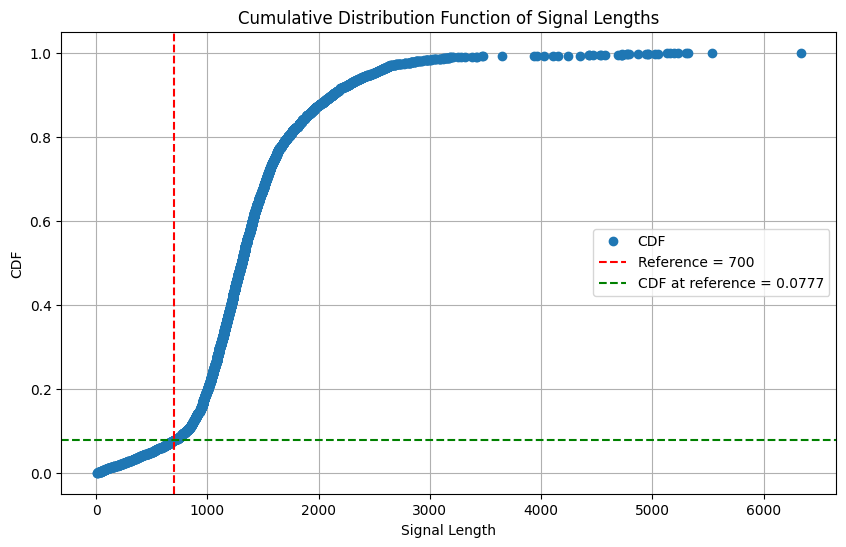

In [6]:
# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, cdf, marker='o', linestyle='none', label='CDF')
plt.axvline(reference_number, color='r', linestyle='--', label=f'Reference = {reference_number}')
cdf_value_at_reference = cdf[index] if index < len(cdf) else 1
plt.axhline(cdf_value_at_reference, color='g', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference:.4f}')
plt.xlabel('Signal Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Signal Lengths')
plt.legend()
plt.grid(True)


In [7]:
reference_number = 500
count, sorted_lengths, cdf, index = count_greater_or_equal(signal_lengths, reference_number)

print(f"Number of signals with length >= {reference_number}: {count}")
print(f"Index: {index}, Length: {sorted_lengths[index]}, CDF: {cdf[index]}")


Number of signals with length >= 500: 4003
Index: 206, Length: 501, CDF: 0.04918032786885246


less than 5% of the signals are under the 500 threshold.

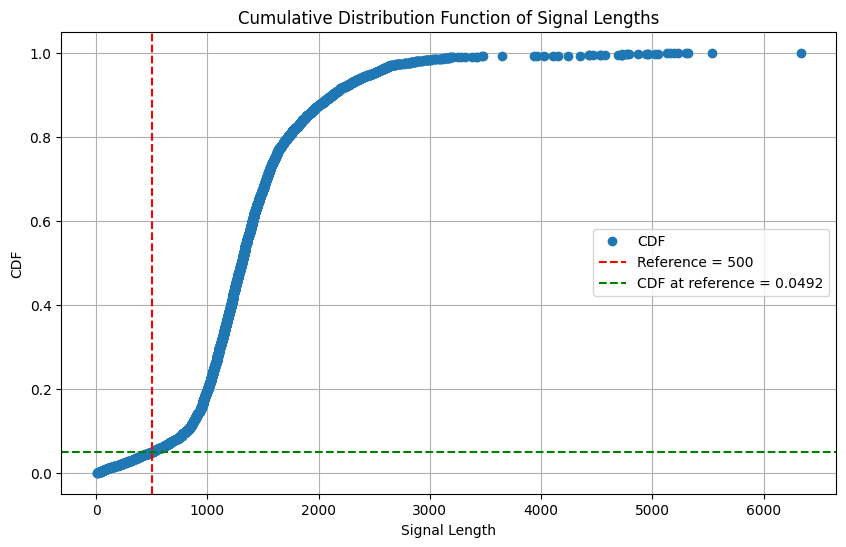

In [8]:
# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, cdf, marker='o', linestyle='none', label='CDF')
plt.axvline(reference_number, color='r', linestyle='--', label=f'Reference = {reference_number}')
cdf_value_at_reference = cdf[index] if index < len(cdf) else 1
plt.axhline(cdf_value_at_reference, color='g', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference:.4f}')
plt.xlabel('Signal Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Signal Lengths')
plt.legend()
plt.grid(True)


THRESHOLD == 700

In [4]:
df_700 = df[df['new_datasize'] >= 700]
df_700.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3883 non-null   float64
 1   PARTICIPANT     3883 non-null   float64
 2   T               3883 non-null   float64
 3   ET              3883 non-null   float64
 4   datasize        3883 non-null   float64
 5   PRODUCT_DH      3883 non-null   float64
 6   WEIGHT          3883 non-null   float64
 7   SPAN_1          3883 non-null   float64
 8   SPAN_2          3883 non-null   float64
 9   SHAPE_SPAN_1    3883 non-null   float64
 10  SHAPE_SPAN_2    3883 non-null   float64
 11  AD              3883 non-null   float64
 12  SPAN_DH         3883 non-null   float64
 13  GRASP_DH        3883 non-null   float64
 14  ORI_PRODUCT_DH  3883 non-null   float64
 15  ACTION_DH       3883 non-null   float64
 16  TASK_HEIGHT     3883 non-null   float64
 17  GENDER          3883 non-null   f

Number of signals with length >= 2000: 527
Index: 3356, Length: 2001, CDF: 0.8645377285603915
Number of signals with length >= 1000: 3379
Index: 504, Length: 1000, CDF: 0.13005408189544168
Number of signals with length >= 3000: 69
Index: 3814, Length: 3009, CDF: 0.9824877671903167


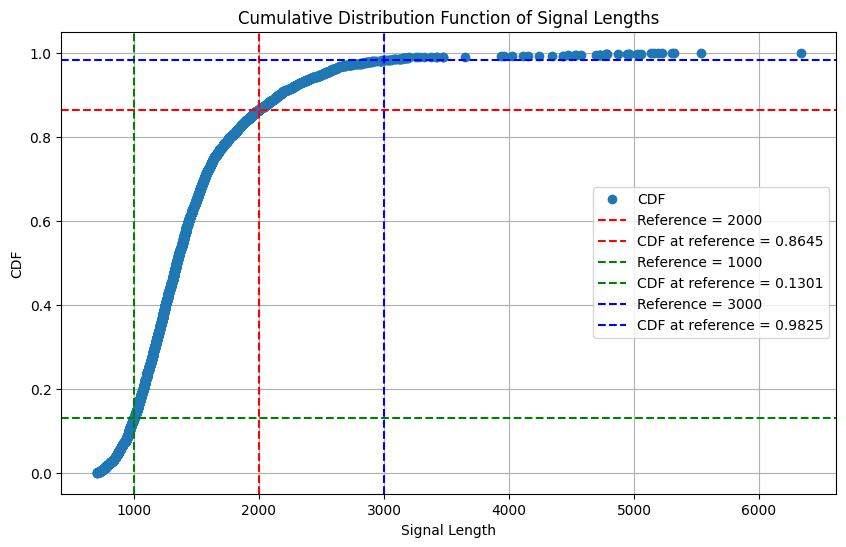

In [9]:
signal_lengths = list(df_700['new_datasize'])  

reference_number = 2000
reference_number_1 = 1000
reference_number_2 = 3000
count, sorted_lengths, cdf, index = count_greater_or_equal(signal_lengths, reference_number)
count_1, sorted_lengths_1, cdf_1, index_1 = count_greater_or_equal(signal_lengths, reference_number_1)
count_2, sorted_lengths_2, cdf_2, index_2 = count_greater_or_equal(signal_lengths, reference_number_2)


print(f"Number of signals with length >= {reference_number}: {count}")
print(f"Index: {index}, Length: {sorted_lengths[index]}, CDF: {cdf[index]}")

print(f"Number of signals with length >= {reference_number_1}: {count_1}")
print(f"Index: {index_1}, Length: {sorted_lengths_1[index_1]}, CDF: {cdf_1[index_1]}")

print(f"Number of signals with length >= {reference_number_2}: {count_2}")
print(f"Index: {index_2}, Length: {sorted_lengths_2[index_2]}, CDF: {cdf_2[index_2]}")

# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, cdf, marker='o', linestyle='none', label='CDF')
plt.axvline(reference_number, color='r', linestyle='--', label=f'Reference = {reference_number}')
cdf_value_at_reference = cdf[index] if index < len(cdf) else 1
plt.axhline(cdf_value_at_reference, color='r', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference:.4f}')

plt.axvline(reference_number_1, color='g', linestyle='--', label=f'Reference = {reference_number_1}')
cdf_value_at_reference_1 = cdf_1[index_1] if index_1 < len(cdf_1) else 1
plt.axhline(cdf_value_at_reference_1, color='g', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference_1:.4f}')

plt.axvline(reference_number_2, color='b', linestyle='--', label=f'Reference = {reference_number_2}')
cdf_value_at_reference_2 = cdf_2[index_2] if index_2 < len(cdf_2) else 1
plt.axhline(cdf_value_at_reference_2, color='b', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference_2:.4f}')


plt.xlabel('Signal Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Signal Lengths')
plt.legend()
plt.grid(True)

Number of signals with length >= 1000: 3379
Index: 504, Length: 1000, CDF: 0.13005408189544168


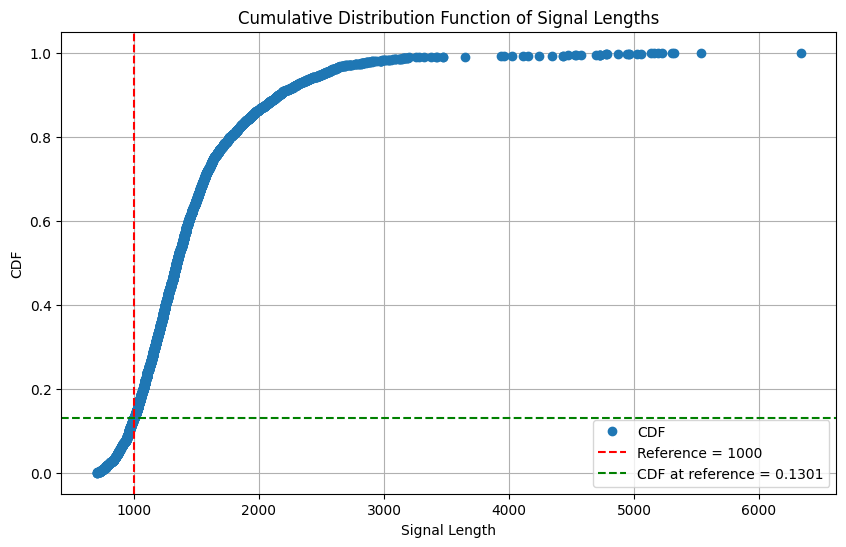

In [8]:
signal_lengths = list(df_700['new_datasize'])  

reference_number = 1000
count, sorted_lengths, cdf, index = count_greater_or_equal(signal_lengths, reference_number)

print(f"Number of signals with length >= {reference_number}: {count}")
print(f"Index: {index}, Length: {sorted_lengths[index]}, CDF: {cdf[index]}")

# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, cdf, marker='o', linestyle='none', label='CDF')
plt.axvline(reference_number, color='r', linestyle='--', label=f'Reference = {reference_number}')
cdf_value_at_reference = cdf[index] if index < len(cdf) else 1
plt.axhline(cdf_value_at_reference, color='g', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference:.4f}')
plt.xlabel('Signal Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Signal Lengths')
plt.legend()
plt.grid(True)

Number of signals with length >= 3000: 69
Index: 3814, Length: 3009, CDF: 0.9824877671903167


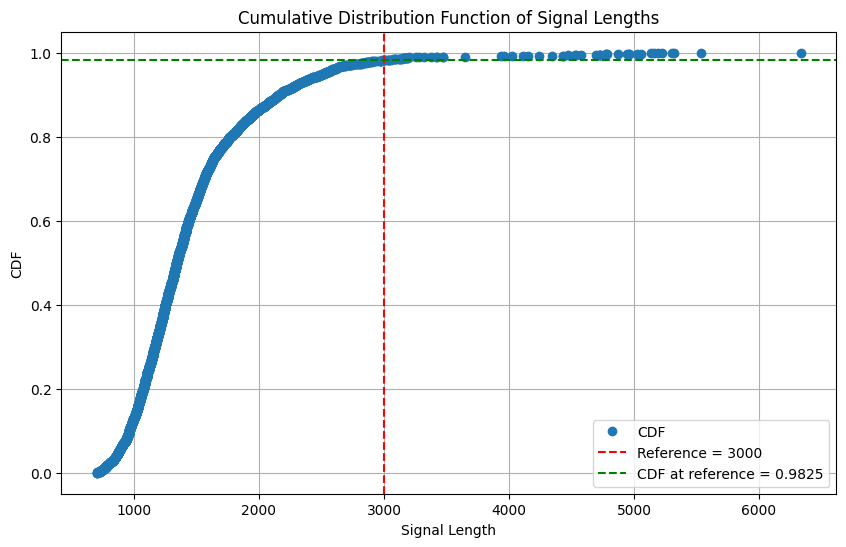

In [9]:
signal_lengths = list(df_700['new_datasize'])  

reference_number = 3000
count, sorted_lengths, cdf, index = count_greater_or_equal(signal_lengths, reference_number)

print(f"Number of signals with length >= {reference_number}: {count}")
print(f"Index: {index}, Length: {sorted_lengths[index]}, CDF: {cdf[index]}")

# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_lengths, cdf, marker='o', linestyle='none', label='CDF')
plt.axvline(reference_number, color='r', linestyle='--', label=f'Reference = {reference_number}')
cdf_value_at_reference = cdf[index] if index < len(cdf) else 1
plt.axhline(cdf_value_at_reference, color='g', linestyle='--', label=f'CDF at reference = {cdf_value_at_reference:.4f}')
plt.xlabel('Signal Length')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Signal Lengths')
plt.legend()
plt.grid(True)

Saving metadata with new datasize

In [16]:
df_700.to_parquet('TFM_METADATA_FINAL.parquet', index=False)

In [2]:
df_final = pd.read_parquet('TFM_METADATA_FINAL.parquet')


In [3]:
df_final

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT,new_datasize
0,1.0,1.0,102.0,1.0,1216.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0,1216
1,2.0,1.0,102.0,4.0,1193.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0,1193
2,3.0,1.0,103.0,7.0,1251.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0,1251
3,4.0,1.0,103.0,10.0,1120.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0,1120
4,5.0,1.0,104.0,13.0,2542.0,3.0,713.0,74.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0,2541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,4439.0,26.0,341.0,587.0,2132.0,93.0,75.5,25.0,0.0,1.0,...,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1892
3879,4440.0,26.0,344.0,597.0,1742.0,81.0,228.0,78.0,11.0,2.0,...,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1122
3880,4441.0,26.0,345.0,601.0,1961.0,97.0,0.0,5.0,6.0,2.0,...,5.0,1.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1741
3881,4442.0,26.0,346.0,604.0,2227.0,98.0,22.7,15.0,0.0,1.0,...,7.0,2.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0,1827


## 2- DATA ANALYSIS (GENERAL)


### Histogram by grasp type

GRASP_DH
1.0    1631
4.0     698
2.0     556
3.0     463
7.0     205
6.0     166
8.0      94
5.0      70
Name: count, dtype: int64


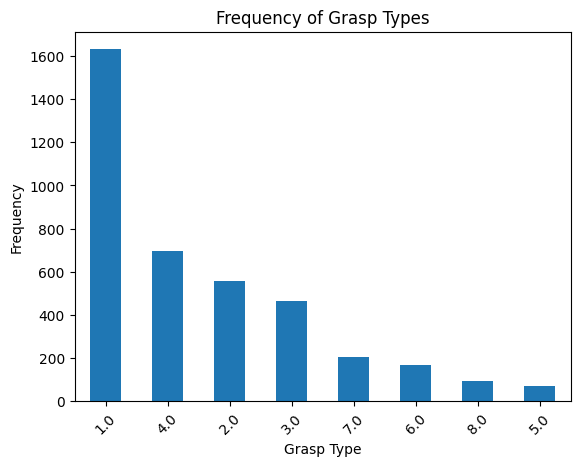

In [41]:
# Calculate value counts
grasp_counts = df_final['GRASP_DH'].value_counts()
print(grasp_counts)
# Plotting
grasp_counts.plot(kind='bar')
plt.title('Frequency of Grasp Types')
plt.xlabel('Grasp Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

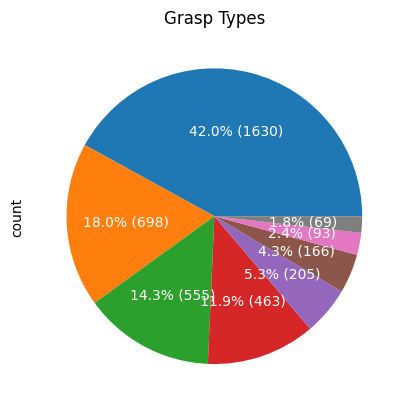

In [40]:
# Plotting the pie chart with counts and percentage labels
ax = grasp_counts.plot.pie(autopct=lambda pct: f"{pct:.1f}% ({int(pct * len(df_final) / 100)})")
plt.title('Grasp Types')

# Set the percentage labels to white
for text in ax.texts:
    text.set_color('white')

plt.show()

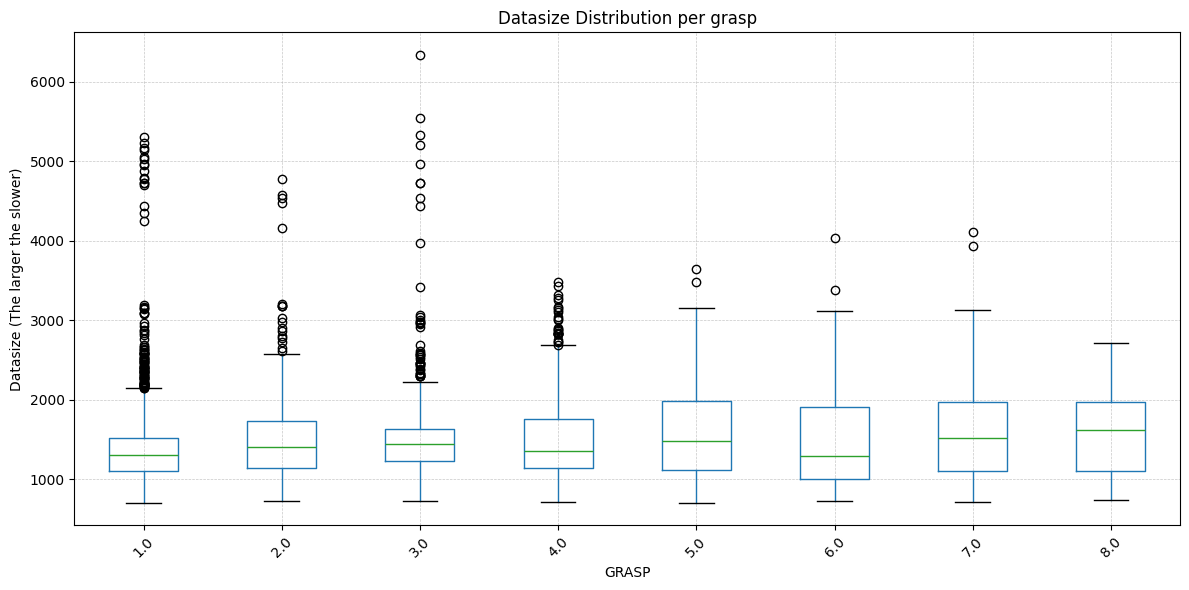

In [21]:
 # Group by 'grasp_dh' and extract the 'datasize'
datasize_per_grasp = df_final.groupby('GRASP_DH')['new_datasize'].apply(list)

# Create a DataFrame from the series within the group
datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_grasp.items()})

# Visualizing the datasize distribution per participant with a box plot
plt.figure(figsize=(12, 6))  # Define the figure size
datasize_df.boxplot()  # Create a box plot
plt.title(f'Datasize Distribution per grasp')  # Set the title of the plot
plt.xlabel('GRASP')  # Set the x-axis label
plt.ylabel('Datasize (The larger the slower)')  # Set the y-axis label
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Show the plot

many grasp types have outliers

### Histogram by TASK HEIGHT

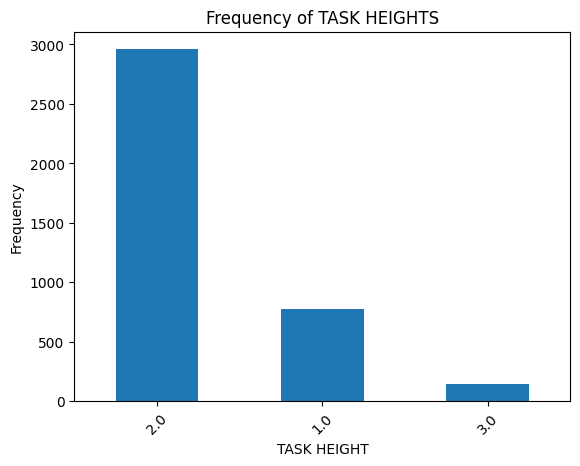

In [24]:
# Calculate value counts
t_height_counts = df_final['TASK_HEIGHT'].value_counts()

# Plotting
t_height_counts.plot(kind='bar')
plt.title('Frequency of TASK HEIGHTS')
plt.xlabel('TASK HEIGHT')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

In [42]:
task_theight_counts = df_final.groupby('GRASP_DH')['TASK_HEIGHT'].value_counts().unstack(fill_value=0)
task_theight_counts

TASK_HEIGHT,1.0,2.0,3.0
GRASP_DH,,,
1.0,415,1216,0
2.0,130,426,0
3.0,104,359,0
4.0,126,523,49
5.0,0,70,0
6.0,0,66,100
7.0,0,205,0
8.0,0,94,0


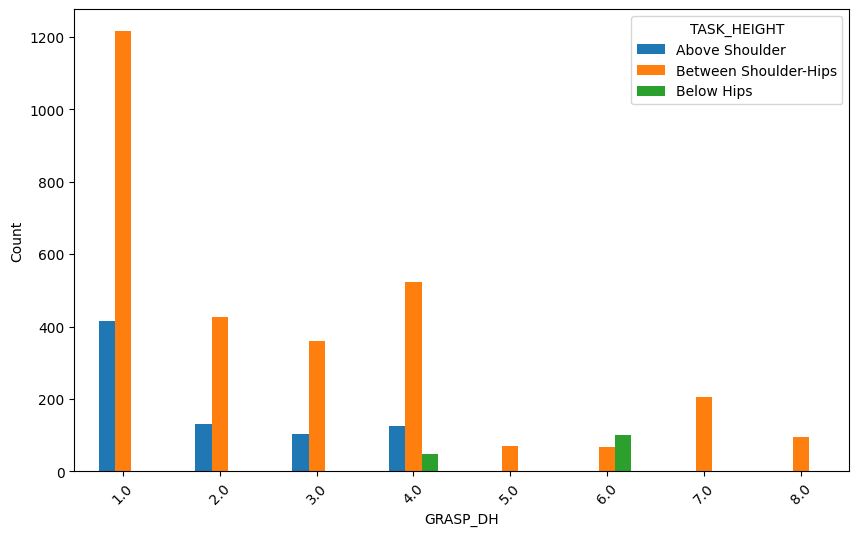

In [47]:
# Update the legend labels
legend_labels = {1.0: 'Above Shoulder', 2.0: 'Between Shoulder-Hips', 3.0: 'Below Hips'}
task_theight_counts.rename(columns=legend_labels, inplace=True)

# Plotting the bar plot
task_theight_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('GRASP_DH')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Histogram by PARTICIPANT

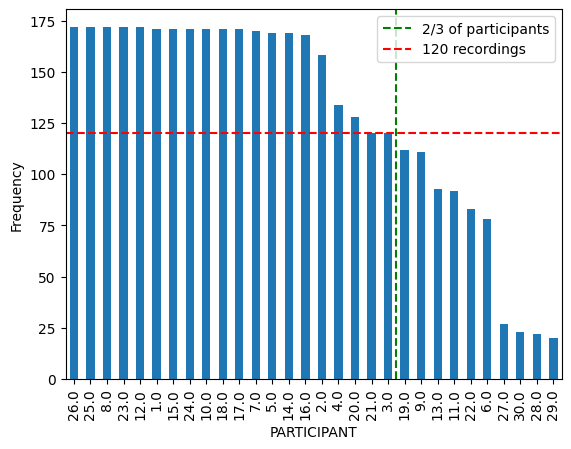

In [67]:
# Calculate value counts
participant_counts = df_final['PARTICIPANT'].value_counts()

# Plotting
ax = participant_counts.plot(kind='bar')
plt.xlabel('PARTICIPANT')
plt.ylabel('Frequency')

# Add a green vertical discontinuous line after the bar of participant 3.0
ax.axvline(x=19.5, color='green', linestyle='--')
ax.axhline(y=120, color='red', linestyle='--')

ax.legend(['2/3 of participants', '120 recordings'])
plt.show()

In [28]:
participant_counts

PARTICIPANT
26.0    172
25.0    172
8.0     172
23.0    172
12.0    172
1.0     171
15.0    171
24.0    171
10.0    171
18.0    171
17.0    171
7.0     170
5.0     169
14.0    169
16.0    168
2.0     158
4.0     134
20.0    128
21.0    120
3.0     120
19.0    112
9.0     111
13.0     93
11.0     92
22.0     83
6.0      78
27.0     27
30.0     23
28.0     22
29.0     20
Name: count, dtype: int64

the last training participant has 120 recordings

In [29]:
training_participants = participant_counts.nlargest(20).index.tolist()
training_participants = sorted(training_participants)
training_participants

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 10.0,
 12.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 23.0,
 24.0,
 25.0,
 26.0]

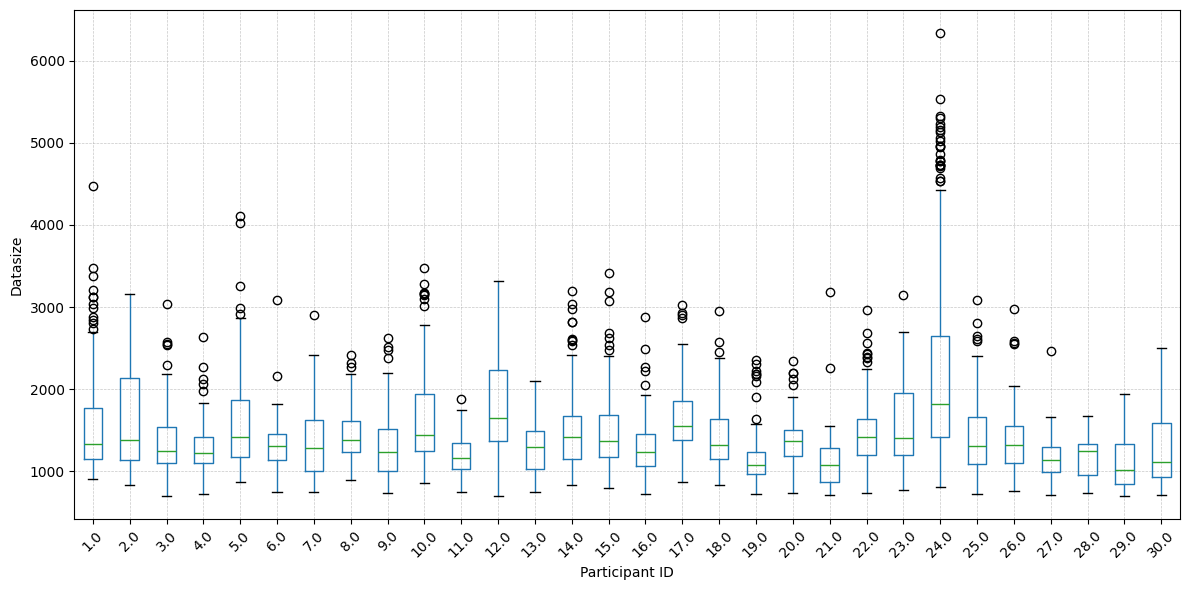

In [95]:
 # Group by 'PARTICIPANT' and extract the 'datasize'
datasize_per_participant = df_final.groupby('PARTICIPANT')['new_datasize'].apply(list)

# Create a DataFrame from the series within the group
datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_participant.items()})



# Visualizing the datasize distribution per participant with a box plot
plt.figure(figsize=(12, 6)) 
datasize_df.boxplot()  
plt.xlabel('Participant ID') 
plt.ylabel('Datasize')  
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [105]:
def calculate_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    return Q3 - Q1

# Apply the function to each column
iqr_values = datasize_df.apply(calculate_iqr)


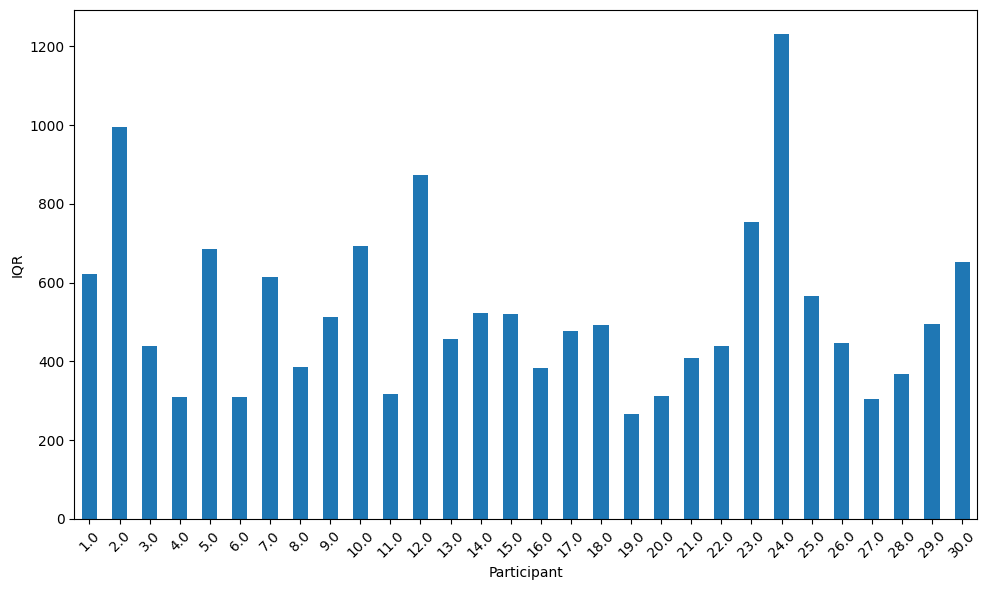

In [109]:
plt.figure(figsize=(10, 6))
iqr_values.plot(kind='bar')
plt.xlabel('Participant')
plt.ylabel('IQR')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

the IQR vary a lot but 24 exceeds the res

### Gender  

[51.27478753541076, 48.725212464589234]


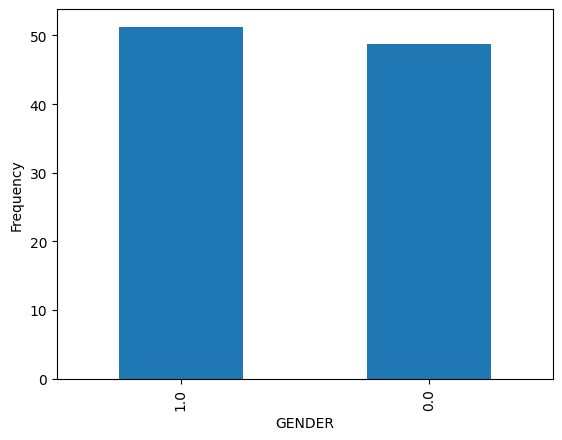

In [49]:
# Calculate value counts
gender_counts = df_final['GENDER'].value_counts(normalize=True) * 100
print(list(gender_counts))
# Plotting
gender_counts.plot(kind='bar')
plt.xlabel('GENDER')
plt.ylabel('Frequency')
plt.show()

C:\Users\al385931\AppData\Local\Temp\ipykernel_18032\3118897457.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_datasize_count = df.groupby(['GENDER', 'new_datasize_bin']).size().unstack()


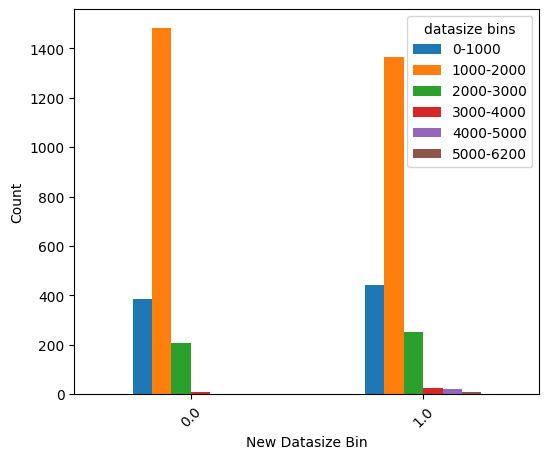

In [57]:
# Bin the new_datasize values
bins = [0, 1000, 2000, 3000, 4000, 5000, 6200]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6200']
df['new_datasize_bin'] = pd.cut(df['new_datasize'], bins=bins, labels=labels)

# Group by gender and new_datasize_bin and calculate the count
gender_datasize_count = df.groupby(['GENDER', 'new_datasize_bin']).size().unstack()

# Plotting the bar plot
gender_datasize_count.plot(kind='bar', figsize=(6, 5))
plt.xlabel('New Datasize Bin')
plt.ylabel('Count')
plt.legend(title='datasize bins')
plt.xticks(rotation=45)
plt.show()

paarticipant 24 is a female, 1 and 5 too

In [117]:
participant24= df[df['PARTICIPANT'] == 24.0]
participant24

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT,new_datasize,new_datasize_bin
2109,2111.0,24.0,102.0,1.0,1022.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,45.0,186.0,240.0,173.0,1022,1000-2000
2110,2112.0,24.0,102.0,4.0,990.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0,990,0-1000
2111,2113.0,24.0,103.0,7.0,1038.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,45.0,186.0,240.0,173.0,1038,1000-2000
2112,2114.0,24.0,103.0,10.0,1049.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0,1049,1000-2000
2113,2115.0,24.0,104.0,13.0,2423.0,3.0,713.0,74.0,0.0,1.0,...,1.0,1.0,1.0,1.0,45.0,186.0,240.0,173.0,2332,2000-3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,4361.0,24.0,341.0,587.0,2804.0,93.0,75.5,25.0,0.0,1.0,...,3.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0,2314,2000-3000
4127,4362.0,24.0,344.0,597.0,4303.0,81.0,228.0,78.0,11.0,2.0,...,3.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0,3933,3000-4000
4128,4363.0,24.0,345.0,601.0,3087.0,97.0,0.0,5.0,6.0,2.0,...,1.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0,2857,2000-3000
4129,4364.0,24.0,346.0,604.0,3382.0,98.0,22.7,15.0,0.0,1.0,...,2.0,1.0,2.0,1.0,45.0,186.0,240.0,173.0,3122,3000-4000


## 3- deleting signals

In [4]:
ids = mm.get_ids(df_final)
len(ids)
ids_set = set(ids)  # Use a set for faster lookup


In [126]:
print('ids_set:', ids_set)

ids_set: {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 115.0, 116.0, 117.0, 118.0, 119.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 128.0, 129.0, 131.0, 132.0, 133.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0,

In [122]:
import os
import shutil

# Paths to the folders
source_folder = './SIGNALS_CUT'
destination_folder = './SIGNALS_FINAL'


# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Function to get the file ID from the filename
def get_file_id(filename):
    try:
        # Extract the ID from the filename, e.g., 'EMG_1.h5' -> '1'
        return int(filename.split('_')[1].split('.')[0])
    except ValueError:
        return None

# Iterate over files in the source directory
for filename in os.listdir(source_folder):
    if filename.endswith('.h5'):
        file_id = get_file_id(filename)
        if file_id in ids_set:
            # Construct full file paths
            source_path = os.path.join(source_folder, filename)
            destination_path = os.path.join(destination_folder, filename)
            # Copy the file to the new folder
            shutil.copy(source_path, destination_path)

print('Files have been copied to the new folder.')


Files have been copied to the new folder.


## 4- signals

In [5]:
import movmus2 as mm2

In [6]:
values = mm2.inspect_signals(ids)

shape of data: (7, 1216)
total length of data: 8512
shape of flattened data: (8512,)
done
shape of data: (7, 1193)
total length of data: 8351
shape of flattened data: (8351,)
done
shape of data: (7, 1251)
total length of data: 8757
shape of flattened data: (8757,)
done
shape of data: (7, 1120)
total length of data: 7840
shape of flattened data: (7840,)
done
shape of data: (7, 2541)
total length of data: 17787
shape of flattened data: (17787,)
done
shape of data: (7, 1158)
total length of data: 8106
shape of flattened data: (8106,)
done
shape of data: (7, 1141)
total length of data: 7987
shape of flattened data: (7987,)
done
shape of data: (7, 1108)
total length of data: 7756
shape of flattened data: (7756,)
done
shape of data: (7, 1150)
total length of data: 8050
shape of flattened data: (8050,)
done
shape of data: (7, 1165)
total length of data: 8155
shape of flattened data: (8155,)
done
shape of data: (7, 1170)
total length of data: 8190
shape of flattened data: (8190,)
done
shape of

In [7]:
max_values = [v['max'] for v in values.values()]
print(max_values)

[0.1287071913055857, 0.15721583364194128, 0.21049558119659564, 0.17495948743824216, 0.1662438737495475, 0.18802537588963514, 0.13741916791813275, 0.15830087241950586, 0.1696105177168346, 0.15283021204391337, 0.12606169010430343, 0.15626089331711535, 0.15024235557346313, 0.1350263082793957, 0.18170970475964168, 0.07304188950857579, 0.17211063766748738, 0.2209020864250486, 0.14942824607783708, 0.176997936940481, 0.17678795597387573, 0.06989375909262413, 0.17007664128671948, 0.21248196052129928, 0.1918043763561557, 0.208126165988944, 0.091261730485458, 0.14611651354274077, 0.27141601057316955, 0.12485239872659874, 0.2567087468917993, 0.08555833783756368, 0.15204715568772872, 0.18442895254446498, 0.18303467359347197, 0.18466334046586494, 0.17464228522667324, 0.1895603790875198, 0.14508851873080109, 0.18275195692384605, 0.17103524492435845, 0.205206083878304, 0.19459996064230808, 0.1974839871703495, 0.15977177483571978, 0.12371919946795208, 0.10157745462964039, 0.14386178627726978, 0.129540

In [8]:
min_values = [v['min'] for v in values.values()]
print(min_values)

[0.005519954790893821, 0.0036927138703591223, 0.005264599091970965, 0.004856758554772288, 0.0009318856593430872, 0.00612209666592165, 0.006142563489618266, 0.0034497186615264487, 0.005985295824972154, 0.004593886308371195, 0.004187134284536862, 0.00488460276733629, 0.007487483644603504, 0.001614473443966757, 0.004915595794163385, 0.0028991848409688175, 0.005057024061985823, 0.004597025090936129, 0.003571317983117366, 0.004092356863846766, 0.00474826702944129, 0.0035718511621208255, 0.007423074902887825, 0.003564151683501872, 0.006660524145934849, 0.0035142296227145694, 0.005177792709239741, 0.0036919555200859698, 0.0011435247408918055, 0.0028030200119135962, 0.005297717170479572, 0.0031338042872774254, 0.004720451705773491, 0.0038290857380118004, 0.0034440436698583874, 0.0032103464707754184, 0.0028101352271909094, 0.0023684412445145165, 0.0016453669809949002, 0.0035327951349496123, 0.003184318250225037, 0.0042333130260695665, 0.0026912282262620516, 0.0023685384476493272, 0.002561690884

In [49]:
threshold = 0.01
keys_below_threshold = [key for key, values in values.items() if values['max'] < threshold]
len(keys_below_threshold)

80

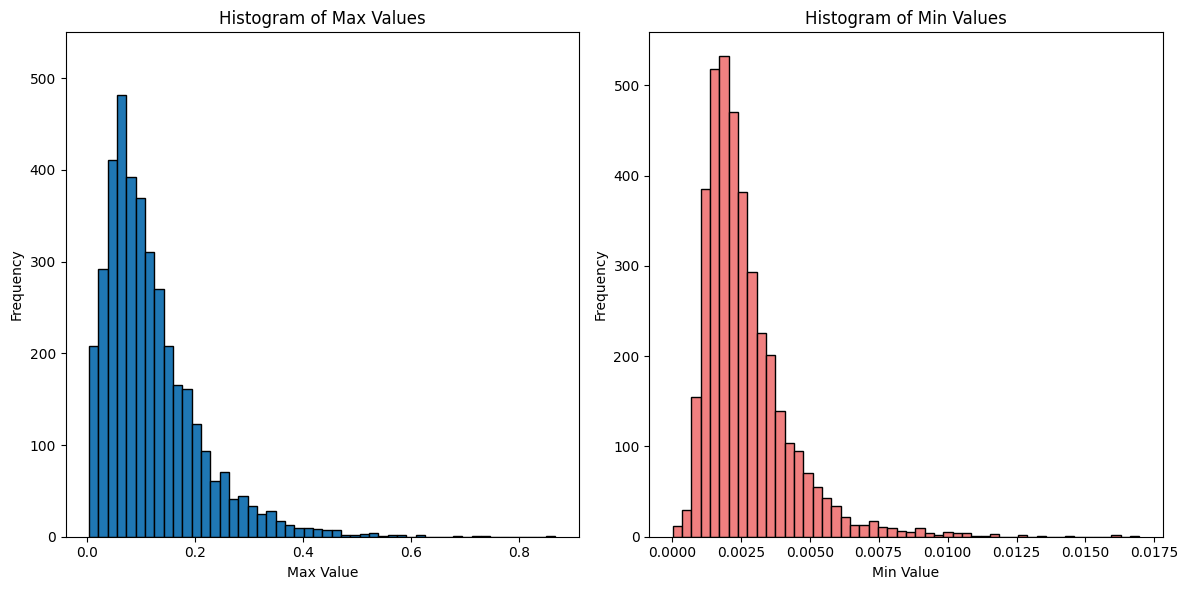

In [47]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Histogram for max values
axs[0].hist(max_values, bins=50, edgecolor='black')
axs[0].set_title('Histogram of Max Values')
axs[0].set_xlabel('Max Value')
axs[0].set_ylabel('Frequency')
axs[0].set_ylim(0, 550)
# Histogram for min values
axs[1].hist(min_values, bins=50, color='lightcoral', edgecolor='black')
axs[1].set_title('Histogram of Min Values')
axs[1].set_xlabel('Min Value')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### domain variation

In [9]:
median_values = [v['median'] for v in values.values()]
print(len(median_values))

3883


In [10]:
ids_grasp = df_final.groupby('GRASP_DH')['ID'].apply(list)
ids_grasp

GRASP_DH
1.0    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
2.0    [61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68....
3.0    [76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83....
4.0    [2390.0, 2391.0, 2392.0, 2393.0, 2394.0, 2395....
5.0    [2419.0, 2420.0, 2421.0, 2459.0, 2460.0, 2461....
6.0    [2422.0, 2423.0, 2424.0, 2425.0, 2426.0, 2427....
7.0    [2428.0, 2429.0, 2468.0, 2469.0, 2588.0, 2589....
8.0    [3437.0, 3438.0, 3439.0, 3441.0, 3442.0, 3476....
Name: ID, dtype: object

In [21]:
ids_1 = ids_grasp[1.0]
ids_2 = ids_grasp[2.0]
ids_3 = ids_grasp[3.0]
ids_4 = ids_grasp[4.0]
ids_5 = ids_grasp[5.0]
ids_6 = ids_grasp[6.0]
ids_7 = ids_grasp[7.0]
ids_8 = ids_grasp[8.0]


In [33]:

def plot_median_histograms_multiple_groups(groups_dict):
    # Determine the number of groups
    num_groups = len(groups_dict)
    
    # Calculate the number of rows and columns for subplots
    num_cols = 4 
    num_rows = 2 
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5), squeeze=False)
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()

    for idx, (group_name, filtered_dict) in enumerate(groups_dict.items()):
        median_values = [values['median'] for values in filtered_dict.values()]

        # Plot median values histogram
        axs[idx].hist(median_values, bins=10, edgecolor='black')
        axs[idx].set_title(f'Median Values for grasp {idx}')
        axs[idx].set_xlabel('Median Value')
        axs[idx].set_ylabel('Frequency')
        axs[idx].set_ylim(0, 500)
        axs[idx].set_xlim(0, 0.07)

    # Turn off unused axes if any
    for ax in axs[num_groups:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


In [23]:
def filter_dict_by_ids(data_dict, id_list):
    return {key: value for key, value in data_dict.items() if key in id_list}


filtered_data_1 = filter_dict_by_ids(data_dict=values, id_list=ids_1)
filtered_data_2 = filter_dict_by_ids(data_dict=values, id_list=ids_2)
filtered_data_3 = filter_dict_by_ids(data_dict=values, id_list=ids_3)
filtered_data_4 = filter_dict_by_ids(data_dict=values, id_list=ids_4)
filtered_data_5 = filter_dict_by_ids(data_dict=values, id_list=ids_5)
filtered_data_6 = filter_dict_by_ids(data_dict=values, id_list=ids_6)
filtered_data_7 = filter_dict_by_ids(data_dict=values, id_list=ids_7)
filtered_data_8 = filter_dict_by_ids(data_dict=values, id_list=ids_8)

In [24]:
groups_dict = {
    'ids_1': filtered_data_1,
    'ids_2': filtered_data_2,
    'ids_3': filtered_data_3,
    'ids_4': filtered_data_4,
    'ids_5': filtered_data_5,
    'ids_6': filtered_data_6,
    'ids_7': filtered_data_7,
    'ids_8': filtered_data_8
}


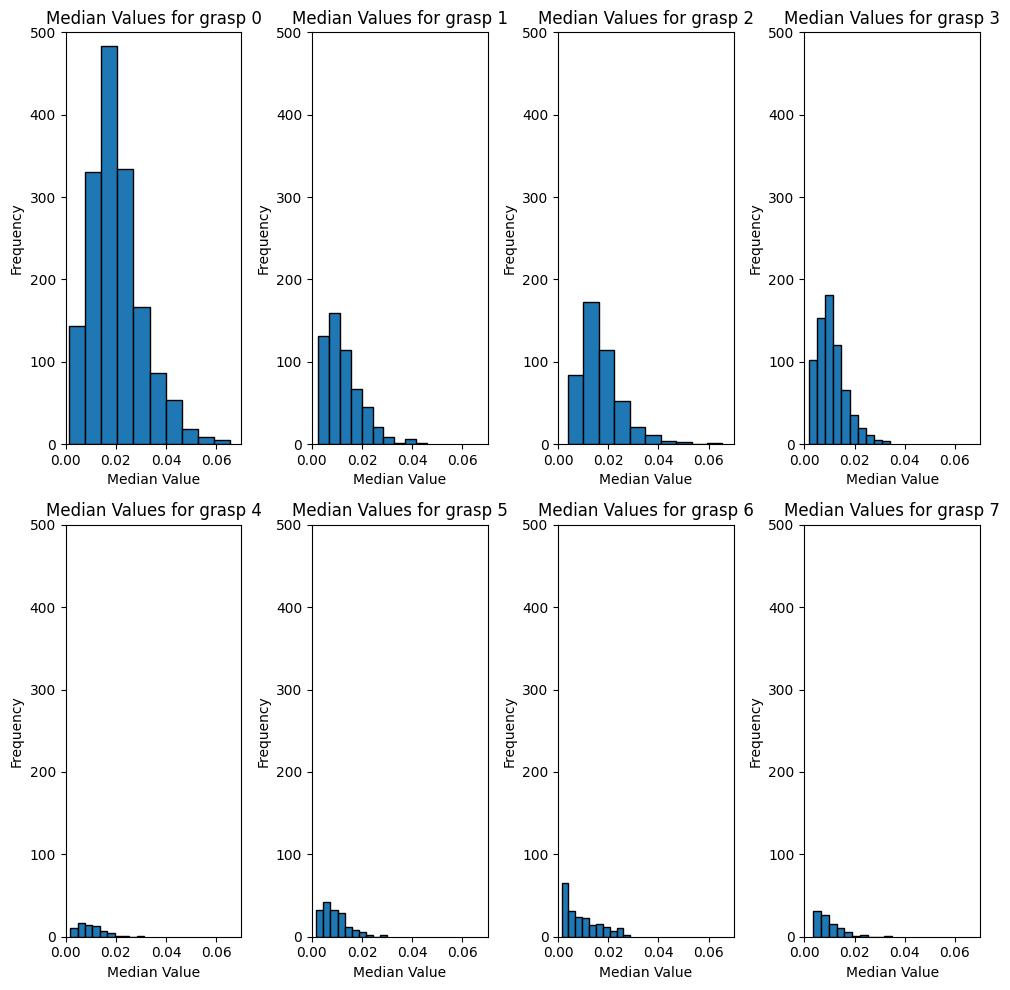

In [34]:
plot_median_histograms_multiple_groups(groups_dict)